In [1]:
### Data Collection

In [2]:
import pandas_datareader as pdr

In [3]:
import pandas as pd

In [4]:
df=pd.read_csv('stock_market.csv')

In [5]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [6]:
 df.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [7]:
df2=df.reset_index()['Close']

In [8]:
df2.shape

(1235,)

In [9]:
df2

0       215.15
1       209.20
2       218.20
3       227.60
4       230.90
         ...  
1230    159.45
1231    160.05
1232    160.15
1233    155.55
1234    155.80
Name: Close, Length: 1235, dtype: float64

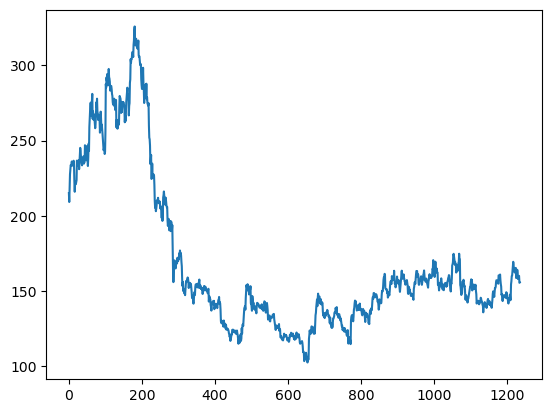

In [10]:
import matplotlib.pyplot as plt
plt.plot(df2)

In [11]:
### LSTM are sensitive to the scale of the data, so we apply MinMax scaler

In [12]:
import numpy as np
np.__version__

'1.21.5'

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df2=scaler.fit_transform(np.array(df2).reshape(-1,1))

In [14]:
df2.shape

(1235, 1)

In [15]:
df2

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       ...,
       [0.25773196],
       [0.2371134 ],
       [0.23823398]])

In [16]:
### Splitting data set into train and test

In [17]:
training_size=int(len(df2)*0.65)
test_size=len(df2)-training_size
train_data, test_data=df2[0:training_size,:], df2[training_size:len(df2),:1] 

In [18]:
training_size, test_size

(802, 433)

In [19]:
len(train_data), len(test_data)

(802, 433)

In [20]:
train_data

array([[0.50425818],
       [0.47758853],
       [0.51792918],
       [0.56006275],
       [0.57485433],
       [0.58762887],
       [0.58538772],
       [0.58987001],
       [0.59816226],
       [0.58561183],
       [0.59143882],
       [0.59278351],
       [0.59345585],
       [0.60040341],
       [0.58852532],
       [0.53787539],
       [0.50806813],
       [0.5349619 ],
       [0.53922008],
       [0.53070372],
       [0.53675482],
       [0.5425818 ],
       [0.60085164],
       [0.59009413],
       [0.59771403],
       [0.5912147 ],
       [0.58583595],
       [0.60242044],
       [0.57530255],
       [0.59524877],
       [0.61810847],
       [0.63872703],
       [0.62909009],
       [0.61272972],
       [0.60466159],
       [0.5912147 ],
       [0.58673241],
       [0.60354101],
       [0.59928283],
       [0.6048857 ],
       [0.61340206],
       [0.59166293],
       [0.59524877],
       [0.59614523],
       [0.64657104],
       [0.62550426],
       [0.62572837],
       [0.611

In [21]:
test_data

array([[0.14298521],
       [0.14029583],
       [0.14455401],
       [0.15934558],
       [0.14500224],
       [0.14993277],
       [0.15441506],
       [0.1474675 ],
       [0.13245182],
       [0.12057373],
       [0.1398476 ],
       [0.14813985],
       [0.13693411],
       [0.1398476 ],
       [0.14500224],
       [0.13939937],
       [0.13424473],
       [0.13312416],
       [0.11676378],
       [0.1185567 ],
       [0.11429852],
       [0.14231286],
       [0.15217391],
       [0.15643209],
       [0.1443299 ],
       [0.16069027],
       [0.15732855],
       [0.15553563],
       [0.17099955],
       [0.19049753],
       [0.19542806],
       [0.18937696],
       [0.20640968],
       [0.20685791],
       [0.20080681],
       [0.20304796],
       [0.19722098],
       [0.19408337],
       [0.20125504],
       [0.20304796],
       [0.2005827 ],
       [0.19565217],
       [0.18780816],
       [0.18018826],
       [0.1824294 ],
       [0.17212013],
       [0.15732855],
       [0.166

In [22]:
### Data Preprocessing

In [23]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [24]:
# reshape into X=t, t+1, t+2, t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [25]:
print(X_train)

[[0.50425818 0.47758853 0.51792918 ... 0.64926042 0.62057373 0.62752129]
 [0.47758853 0.51792918 0.56006275 ... 0.62057373 0.62752129 0.6869117 ]
 [0.51792918 0.56006275 0.57485433 ... 0.62752129 0.6869117  0.82855222]
 ...
 [0.13693411 0.14634693 0.1322277  ... 0.15620798 0.17525773 0.16293142]
 [0.14634693 0.1322277  0.14500224 ... 0.17525773 0.16293142 0.15844913]
 [0.1322277  0.14500224 0.14657104 ... 0.16293142 0.15844913 0.15912147]]


In [26]:
print(X_test.shape), print(ytest.shape)

(332, 100)
(332,)


(None, None)

In [27]:
print(X_train.shape), print(y_train.shape)

(701, 100)
(701,)


(None, None)

In [28]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [29]:
### Creating LSTM Model

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

C:\Users\Dell\anaconda3\envs\env_deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dell\anaconda3\envs\env_deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dell\anaconda3\envs\env_deeplearning\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Dell\anaconda3\envs\env_deeplearni

In [31]:
model=Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [33]:
X_train[:100]

array([[[0.50425818],
        [0.47758853],
        [0.51792918],
        ...,
        [0.64926042],
        [0.62057373],
        [0.62752129]],

       [[0.47758853],
        [0.51792918],
        [0.56006275],
        ...,
        [0.62057373],
        [0.62752129],
        [0.6869117 ]],

       [[0.51792918],
        [0.56006275],
        [0.57485433],
        ...,
        [0.62752129],
        [0.6869117 ],
        [0.82855222]],

       ...,

       [[0.64926042],
        [0.62057373],
        [0.62752129],
        ...,
        [0.89690722],
        [0.88525325],
        [0.88839086]],

       [[0.62057373],
        [0.62752129],
        [0.6869117 ],
        ...,
        [0.88525325],
        [0.88839086],
        [0.8874944 ]],

       [[0.62752129],
        [0.6869117 ],
        [0.82855222],
        ...,
        [0.88839086],
        [0.8874944 ],
        [0.84356791]]])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test,ytest),epochs=100, batch_size=64, verbose=1)

Train on 701 samples, validate on 332 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
701/701 [==============================] - 5s 7ms/sample - loss: 0.0449 - val_loss: 0.0020
Epoch 2/100
701/701 [==============================] - 3s 4ms/sample - loss: 0.0082 - val_loss: 0.0021
Epoch 3/100
701/701 [==============================] - 3s 4ms/sample - loss: 0.0044 - val_loss: 0.0024
Epoch 4/100
701/701 [==============================] - 3s 5ms/sample - loss: 0.0027 - val_loss: 0.0013
Epoch 5/100
701/701 [==============================] - 4s 5ms/sample - loss: 0.0024 - val_loss: 8.4057e-04
Epoch 6/100
701/701 [==============================] - 4s 5ms/sample - loss: 0.0023 - val_loss: 0.0012
Epoch 7/100
701/701 [==============================] - 4s 6ms/sample - loss: 0.0022 - val_loss: 8.3643e-04
Epoch 8/100
701/701 [==============================] - 4s 5ms/sample - loss: 0.0022 - val_loss: 9.1850e-04
Epoch 9/100
701/701 [===

Epoch 73/100
701/701 [==============================] - 3s 5ms/sample - loss: 7.8217e-04 - val_loss: 6.0469e-04
Epoch 74/100
701/701 [==============================] - 4s 5ms/sample - loss: 8.4812e-04 - val_loss: 4.7623e-04
Epoch 75/100
701/701 [==============================] - 3s 5ms/sample - loss: 7.9651e-04 - val_loss: 4.7871e-04
Epoch 76/100
701/701 [==============================] - 3s 5ms/sample - loss: 7.8332e-04 - val_loss: 4.5130e-04
Epoch 77/100
701/701 [==============================] - 3s 5ms/sample - loss: 7.9762e-04 - val_loss: 4.6707e-04
Epoch 78/100
701/701 [==============================] - 4s 6ms/sample - loss: 8.7055e-04 - val_loss: 5.4346e-04
Epoch 79/100
701/701 [==============================] - 4s 5ms/sample - loss: 8.3405e-04 - val_loss: 4.6136e-04
Epoch 80/100
701/701 [==============================] - 4s 6ms/sample - loss: 8.5305e-04 - val_loss: 4.3017e-04
Epoch 81/100
701/701 [==============================] - 3s 5ms/sample - loss: 7.7486e-04 - val_loss: 4.8

In [ ]:
import tensorflow as tf
tf.__version__

In [ ]:
### Prediction and Performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
### Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE Performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting

# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back,:] = train_predict

# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1,:] = test_predict

#plot baseline and predictions
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[333:].reshape(1,-1)
x_input.shape

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
### Demonstrating prediction for next few days

from numpy import array
lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input,verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)
        
        

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df2)

In [ ]:
df3=df2.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])